In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [30]:
# Load the data
nl_df = pd.read_csv('/Users/Alexa VT/Documents/GitHub/Project2-2/Project_2-2/test_nl/processed_data.csv')

# Filter data for Amsterdam
ams_df = nl_df[(nl_df['latitude'] == 52.25) & (nl_df['longitude'] == 5.)]

# Sort values by time and set time as index
ams_df = ams_df.sort_values(by='time').set_index('time')

# Drop unnecessary columns
ams_df = ams_df.drop(['latitude', 'longitude', 'surface', 'step', 'number', 'valid_time'], axis=1)

# Rename 't2m' column to 'temp'
ams_df.rename(columns={'t2m': 'temp'}, inplace=True)

In [31]:
nl_df.head()

,time,latitude,longitude,surface,u10,v10,d2m,t2m,sp,tcc,...,month_7,month_8,month_9,month_10,month_11,month_12,hour_0,hour_6,hour_12,hour_18
0,2010-01-01 00:00:00,53.5,3.50,0.0,-8.545227,-7.018692,270.34955,277.60290,100182.81,0.651825,...,False,False,False,False,False,False,True,False,False,False
1,2010-01-01 00:00:00,53.5,3.75,0.0,-8.562805,-6.929825,270.52728,277.48962,100171.81,0.710113,...,False,False,False,False,False,False,True,False,False,False
2,2010-01-01 00:00:00,53.5,4.00,0.0,-8.588196,-6.831192,270.71674,277.33142,100167.81,0.787964,...,False,False,False,False,False,False,True,False,False,False
3,2010-01-01 00:00:00,53.5,4.25,0.0,-8.690735,-6.696426,270.91595,277.14783,100167.81,0.839111,...,False,False,False,False,False,False,True,False,False,False
4,2010-01-01 00:00:00,53.5,4.50,0.0,-8.834290,-6.563614,271.01752,276.96228,100161.81,0.888733,...,False,False,False,False,False,False,True,False,False,False


In [15]:
# Train-test split
train_split = round(len(ams_df) * 0.8)
ams_df_train = ams_df.iloc[:train_split]
ams_df_test = ams_df.iloc[train_split:]

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
ams_df_train_scaled = scaler.fit_transform(ams_df_train)
ams_df_test_scaled = scaler.transform(ams_df_test)  # Use transform for test data


In [16]:
# Define function to create X, y pairs
def createXY(dataset, n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
        dataX.append(dataset[i - n_past:i, :-1])
        dataY.append(dataset[i, -1])
    return np.array(dataX), np.array(dataY)

In [17]:
# Create X, y pairs for training and testing sets
n_past = 30
X_train, Y_train = createXY(ams_df_train_scaled, n_past)
X_test, Y_test = createXY(ams_df_test_scaled, n_past)

# Reshape the data for linear regression
X_train_linear = X_train.reshape(X_train.shape[0], -1)
X_test_linear = X_test.reshape(X_test.shape[0], -1)


In [21]:
# Create a linear regression model
linear_model = LinearRegression()

# Train the linear regression model
linear_model.fit(X_train_linear, Y_train)

# Make predictions
predictions_linear = linear_model.predict(X_test_linear)


TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'

In [24]:
# Print first few predictions
print("Predictions:", predictions_linear[:10])

# Print trained model coefficients
print("Model Coefficients:", linear_model.coef_)

# Print scaled test data
print("Scaled Test Data:", X_test_linear[:10])

# Evaluate the model
mse_linear = mean_squared_error(Y_test, predictions_linear)
print("Mean Squared Error (Linear Regression):", mse_linear)

Predictions: [ 4.16333634e-16  7.77156117e-16 -1.38777878e-16  1.00000000e+00
  4.71844785e-16  6.66133815e-16  0.00000000e+00  1.00000000e+00
  4.44089210e-16  6.93889390e-16]
Model Coefficients: [ 1.34836299e-18  5.13478149e-16  1.94289029e-15 -2.57432964e-15
  1.10501885e-15 -9.36750677e-17 -2.34481036e-03 -2.34481036e-03
 -2.34481036e-03 -2.34481036e-03 -2.34481036e-03 -2.34481036e-03
 -2.34481036e-03 -2.34481036e-03 -2.34481036e-03 -2.34481036e-03
 -2.34481036e-03 -2.34481036e-03 -1.24505156e-02  3.49168857e-02
 -9.00060149e-03  4.20480708e-16 -4.32596667e-17 -1.36506475e-15
  1.65994741e-16 -1.38943050e-15  2.51738192e-17 -1.31590863e-04
 -1.31590863e-04 -1.31590863e-04 -1.31590863e-04 -1.31590863e-04
 -1.31590863e-04 -1.31590863e-04 -1.31590863e-04 -1.31590863e-04
 -1.31590863e-04 -1.31590863e-04 -1.31590863e-04 -1.13354142e-02
 -1.03881200e-02  3.24362388e-02 -2.85145171e-17  4.95480393e-17
 -1.12946761e-16 -1.08094957e-16  4.11549592e-16 -3.90312782e-18
 -2.67293783e-05 -2.672

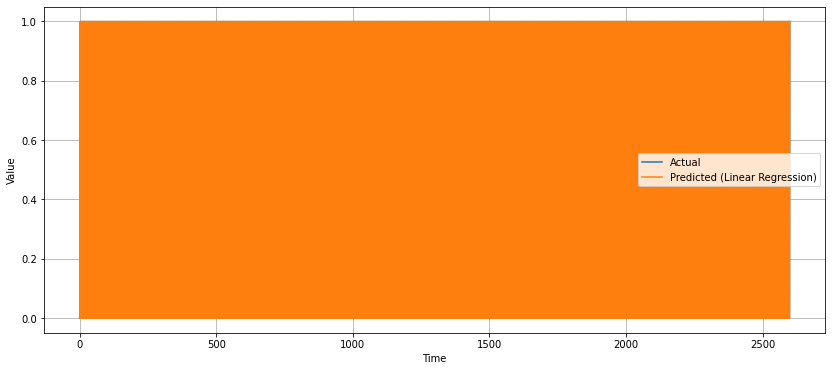

In [26]:
# Plotting the results
plt.figure(figsize=(14, 6))
plt.plot(Y_test, label='Actual')
plt.plot(predictions_linear, label='Predicted (Linear Regression)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()